In [42]:
import imp
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

from tensorflow.keras.utils import to_categorical

In [43]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

print('Training data shape: ', train_x.shape, train_y.shape)
print('Testing data shape: ', test_x.shape, test_y.shape)  # shape = (W * H * Depth)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


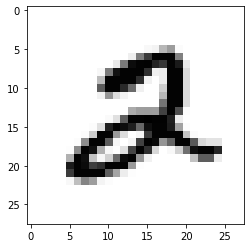

In [44]:
plt.imshow(train_x[5,:,:], cmap="Greys")  # cmap = virdis

In [45]:
train_y[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [46]:
# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs: ', classes_num)
print('Output classes: ', classes)

Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


(-0.5, 27.5, 27.5, -0.5)

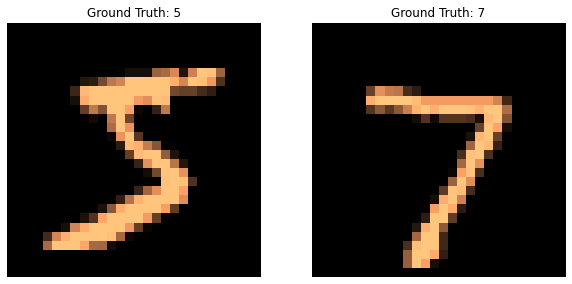

In [47]:
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='copper')
plt.title("Ground Truth: {}".format(train_y[0]))
plt.axis("off")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='copper')
plt.title("Ground Truth: {}".format(test_y[0]))
plt.axis("off")

### 2. Preprocessing

In [48]:
# Change from matrix to array of dimension 28x28 to array of dimension 784

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

print(train_x[0].shape)

(784,)


In [49]:
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = keras.utils.to_categorical(train_y)
test_y_one_hot = keras.utils.to_categorical(test_y) 

In [50]:
train_y.shape, train_y_one_hot.shape

((60000,), (60000, 10))

In [51]:
import pandas as pd

pd.DataFrame(train_y_one_hot, columns=[f"C{i}" for i in classes]).head(n=15)

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 3. Model Configuration

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Input layyer
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))

# Midden layer(s)
model.add(Dense(512, activation='relu'))

# Output layer
model.add(Dense(classes_num, activation='softmax'))

# Model parameters
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training

# Function/Perceptron: predicts binary class: win or lose
# x1: current standings/rank: 1 ... 50
# x2: time of day: 6-21

# Dataset (0: 100, 2,1): 100(number of games), 2 (x1, x2), 1 {win, lose}
# Input 1: D[0,:,0] -> 0

# Epochs: Invloves seeing all images in the training data during one cycle
# Interations: Updates made to network weights based on single or multiple images (batch size)
history = model.fit(train_x, train_y_one_hot,
                   batch_size=256, epochs=10, verbose=True,
                   validation_data=(test_x, test_y_one_hot))

[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")



Epoch 1/10
235/235 [==============================] - 5s 16ms/step - loss: 0.2685 - accuracy: 0.9162 - val_loss: 0.1513 - val_accuracy: 0.9498
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0911 - accuracy: 0.9718 - val_loss: 0.0912 - val_accuracy: 0.9717
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0572 - accuracy: 0.9817 - val_loss: 0.0706 - val_accuracy: 0.9796
Epoch 4/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0833 - val_accuracy: 0.9751
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0734 - val_accuracy: 0.9797
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0744 - val_accuracy: 0.9810
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.0890 - val_accuracy: 0.9803

### 4. Visualize Learning results

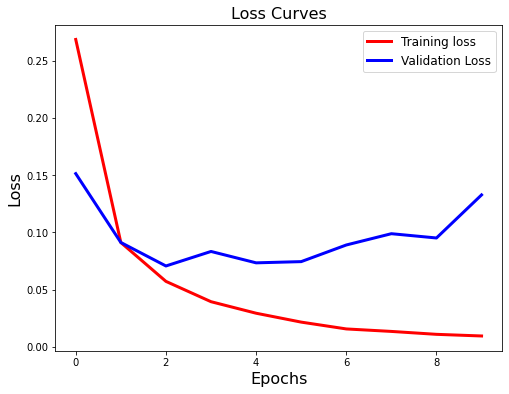

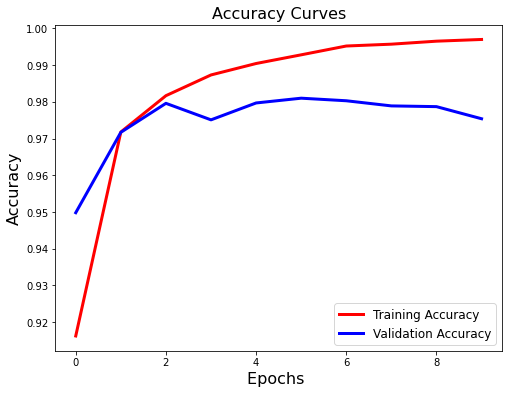

In [55]:
def plot_history(history):
    # Plot the Loss Curves
    plt.figure(figsize=[8,6])
    
    plt.plot(history.history['loss'], 'r', linewidth=3.0)
    plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
    
    plt.legend(['Training loss', 'Validation Loss'], fontsize=12)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Loss Curves', fontsize=16)
    
    # Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    
    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)    
    plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
    
    plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
    plt.xlabel('Epochs ', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title('Accuracy Curves', fontsize=16)
    
plot_history(history)